Shape: (2930, 82)


D:\Users\sravya\sravya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


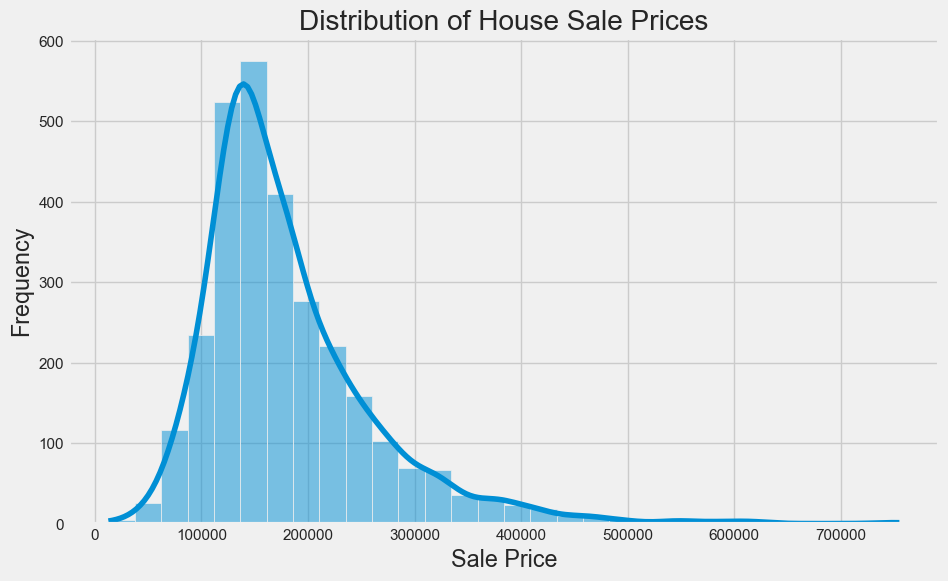

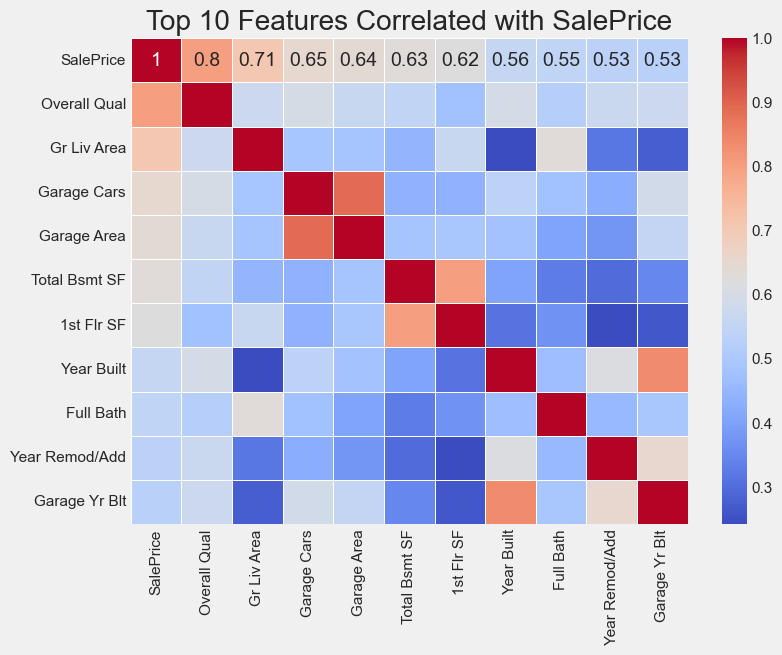

In [6]:
# Import core libraries
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("house_data.csv")

# Quick check
print("Shape:", df.shape)
df.head()
import matplotlib.pyplot as plt
import seaborn as sns

# Set up visuals
sns.set(style="whitegrid")
plt.style.use("fivethirtyeight")

# Target variable distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True, bins=30)
plt.title("Distribution of House Sale Prices")
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.show()

# Top 10 features most correlated with SalePrice
# Calculate correlation matrix
# Calculate correlation matrix for numeric columns only
corr = df.select_dtypes(include=[np.number]).corr()

# Extract top 10 features most correlated with SalePrice (including SalePrice)
top_corr_features = corr['SalePrice'].abs().sort_values(ascending=False).head(11).index

# Plot heatmap for these features
plt.figure(figsize=(8,6))
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Top 10 Features Correlated with SalePrice')
plt.show()


In [20]:
#handle missing values


In [8]:
# Drop columns with >30% missing values
threshold = len(df) * 0.3
df = df.dropna(thresh=threshold, axis=1)

# Fill missing values for numerical columns with median
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Fill missing values for categorical columns with mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("Missing values after processing:\n", df.isnull().sum().sort_values(ascending=False).head(10))


Missing values after processing:
 Order             0
Full Bath         0
Fireplaces        0
Functional        0
TotRms AbvGrd     0
Kitchen Qual      0
Kitchen AbvGr     0
Bedroom AbvGr     0
Half Bath         0
Bsmt Half Bath    0
dtype: int64


In [10]:
if 'Id' in df.columns:
    df.drop('Id', axis=1, inplace=True)

X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (2930, 77)
Target shape: (2930,)


In [12]:
X = pd.get_dummies(X, drop_first=True)
print("Shape after encoding:", X.shape)


Shape after encoding: (2930, 251)


In [16]:
from sklearn.preprocessing import StandardScaler
import joblib

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Save the scaler for future use (e.g., in Streamlit app)
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R2 Score:", r2_score(y_test, y_pred))

# Save the model for deployment
joblib.dump(model, 'house_price_model.pkl')
# Save the list of final feature names used after encoding
joblib.dump(X.columns.tolist(), 'full_features.pkl')
print("✅ Saved: full_features.pkl")



MAE: 15828.28633105802
MSE: 699084898.920411
RMSE: 26440.213670097506
R2 Score: 0.9128056476936759
✅ Saved: full_features.pkl


In [20]:
import sklearn
print("scikit-learn version in Jupyter:", sklearn.__version__)


scikit-learn version in Jupyter: 1.2.2
